# NASA Earth Meteorite Landings

This post shows you how to merge geographic map (which we get from from json file format) and data points (in this case meteorite landings) into a single map and visualize the data.

We will use the URL from NASA's Open Data Portal API from [NASA]("https://data.nasa.gov/resource/y77d-th95.json"), it is a comprehensive data set from The Meteoritical Society. The dataset contains information on all of the known meteorite landings. For the sake of this tutorial we will request data and import it as JSON. Our target is to extract the following features from that data to create a dataframe and then map the points to visualize the locations of the landings. The columns we are interested are listed below:

    -ID
    -Year
    -Fall
    -Name
    -Name Type
    -Mass
    -Latitude
    -Longitude
    
As usual let us import all the necessary libraries that we are going to use.

In [1]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall 
#within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

import requests  #similar to urllib, this library allows a computer to ping a website
import json      #library to handle JSON formatted data
%matplotlib inline

The url we are accessing needs no authentication. When accesing APIs it is better to check if we need authentication keys or not. Besides that, it is also worth cheking the sharing protocol for each websites. Next we use requests library to request the url.

In [2]:

#URL to NASA meteorite API
url = r"https://data.nasa.gov/resource/y77d-th95.json"


In [3]:
#the get function checks to make sure that the website/server is responding back
#200 means that we're good
#https://www.restapitutorial.com/httpstatuscodes.html
resp = requests.get(url)
resp

<Response [200]>

We can check the response status code using the above code line, for further information you can check the [website]('https://www.restapitutorial.com/httpstatuscodes.html'). Once we get the `<Response [200]>` we can go ahead and check if we really are accessing the site by printing it out. As it can be a large output, it is advisable to limit the content if possible. 

In [4]:
#send a request to the website to return back text data from the API
#returns data as JSON string
str_data = resp.text
str_data[:1500]

'[{"name":"Aachen","id":"1","nametype":"Valid","recclass":"L5","mass":"21","fall":"Fell","year":"1880-01-01T00:00:00.000","reclat":"50.775000","reclong":"6.083330","geolocation":{"type":"Point","coordinates":[6.08333,50.775]}}\n,{"name":"Aarhus","id":"2","nametype":"Valid","recclass":"H6","mass":"720","fall":"Fell","year":"1951-01-01T00:00:00.000","reclat":"56.183330","reclong":"10.233330","geolocation":{"type":"Point","coordinates":[10.23333,56.18333]}}\n,{"name":"Abee","id":"6","nametype":"Valid","recclass":"EH4","mass":"107000","fall":"Fell","year":"1952-01-01T00:00:00.000","reclat":"54.216670","reclong":"-113.000000","geolocation":{"type":"Point","coordinates":[-113,54.21667]}}\n,{"name":"Acapulco","id":"10","nametype":"Valid","recclass":"Acapulcoite","mass":"1914","fall":"Fell","year":"1976-01-01T00:00:00.000","reclat":"16.883330","reclong":"-99.900000","geolocation":{"type":"Point","coordinates":[-99.9,16.88333]}}\n,{"name":"Achiras","id":"370","nametype":"Valid","recclass":"L6",

We need to decode the json file and that can be achieved as follows

In [5]:
#loads function reversed dictionary order
#dictionary objects are unordered in general
NASAdata = json.loads(str_data)
#NASAdata

It is also better to verify that JSON object is list and check its length,  this is done by

```Python
type(NASAdata)
len(NASAdata)```

To help us navigate through the tree, we keep asking the types until we reach the end of the hierarchical line.

In [6]:
#first level keys in JSON object
NASAdata[0]

{'name': 'Aachen',
 'id': '1',
 'nametype': 'Valid',
 'recclass': 'L5',
 'mass': '21',
 'fall': 'Fell',
 'year': '1880-01-01T00:00:00.000',
 'reclat': '50.775000',
 'reclong': '6.083330',
 'geolocation': {'type': 'Point', 'coordinates': [6.08333, 50.775]}}

In [7]:

#dict['key']['key'][index]
#dictionary name, dictionary key, dictionary key, then list index
NASAdata[0]['geolocation']


{'type': 'Point', 'coordinates': [6.08333, 50.775]}

In [8]:
type(NASAdata[0]['geolocation'])

dict

In [9]:
NASAdata[0]['geolocation'].keys()

dict_keys(['type', 'coordinates'])

In [10]:

#dict['key']['key'][index]
#dictionary name, dictionary key, dictionary key, then list index
NASAdata[0]['geolocation']['type']


'Point'

In [11]:

type(NASAdata[0]['geolocation']['type'])


str

In [12]:

#dict['key']['key'][index]
#dictionary name, dictionary key, dictionary key, then list index
NASAdata[0]['geolocation']['coordinates']


[6.08333, 50.775]

In [13]:
type(NASAdata[0]['geolocation']['coordinates'])

list

In [14]:
len(NASAdata[0]['geolocation']['coordinates'])

2

In [15]:
NASAdata[0]['geolocation']['coordinates'][0]

6.08333

Let us now create an empyt list where we will put the retrivied information. We use the notation **namels**, where name is the name of the column and *ls* indicate that we are creating new list.

In [16]:
idmls = []
yearls = []
fallls = []
namels = [] 
nametypels = []
massls = []
latitudels = []
longitudels = []

In [17]:
#extract the values for the meteore dataset

for meteor in NASAdata:
      
    #get the value of each key and if the key doesn't exist, set a variable to be None
    try: idm = meteor['id']
    except: idm = None
            
    try: year = meteor['year']
    except: year = None
            
    try: fall = meteor['fall']
    except: fall = None
        
    try: name = meteor['name']
    except: name = None
            
    try: nametype = meteor['nametype']
    except: nametype = None
            
    try: mass = meteor['mass']
    except: mass = None
            
    try: latitude =meteor['geolocation']['coordinates'][1]
    except: latitude = None
            
    try: longitude = meteor['geolocation']['coordinates'][0]
    except: longitude = None
            
    
    idmls.append(idm)
    yearls.append(year)
    fallls.append(fall)
    namels.append(name)  
    nametypels.append(nametype)
    massls.append(mass) 
    latitudels.append(latitude)
    longitudels.append(longitude) 

In [18]:
#check to see first 5 items of a few lists
print(idmls[:5])
print(yearls[:5])
print(fallls[:5])
print(namels[:5])
print(nametypels[:5])
print(massls[:5])

['1', '2', '6', '10', '370']
['1880-01-01T00:00:00.000', '1951-01-01T00:00:00.000', '1952-01-01T00:00:00.000', '1976-01-01T00:00:00.000', '1902-01-01T00:00:00.000']
['Fell', 'Fell', 'Fell', 'Fell', 'Fell']
['Aachen', 'Aarhus', 'Abee', 'Acapulco', 'Achiras']
['Valid', 'Valid', 'Valid', 'Valid', 'Valid']
['21', '720', '107000', '1914', '780']


In [19]:
#check number of items in each list
print(len(idmls))
print(len(yearls))
print(len(fallls))
print(len(namels))
print(len(nametypels))
print(len(massls))
print(len(latitudels))
print(len(longitudels))


1000
1000
1000
1000
1000
1000
1000
1000


In [20]:
#match indices of each list and zip into one list
meteorList = list(zip(idmls, yearls, fallls, namels, 
                    nametypels, massls, latitudels, longitudels))

#names for columns in data frame
colnames = ['id', 'year', 'fall','name', 'nametype', 'mass', 'latitude', 'longitude']

In [21]:
#create data frame with column names in it
df = pd.DataFrame(meteorList, columns=colnames)

df.head(10)

,id,year,fall,name,nametype,mass,latitude,longitude
0,1,1880-01-01T00:00:00.000,Fell,Aachen,Valid,21,50.77500,6.08333
1,2,1951-01-01T00:00:00.000,Fell,Aarhus,Valid,720,56.18333,10.23333
2,6,1952-01-01T00:00:00.000,Fell,Abee,Valid,107000,54.21667,-113.00000
3,10,1976-01-01T00:00:00.000,Fell,Acapulco,Valid,1914,16.88333,-99.90000
4,370,1902-01-01T00:00:00.000,Fell,Achiras,Valid,780,-33.16667,-64.95000
5,379,1919-01-01T00:00:00.000,Fell,Adhi Kot,Valid,4239,32.10000,71.80000
6,390,1949-01-01T00:00:00.000,Fell,Adzhi-Bogdo (stone),Valid,910,44.83333,95.16667
7,392,1814-01-01T00:00:00.000,Fell,Agen,Valid,30000,44.21667,0.61667
8,398,1930-01-01T00:00:00.000,Fell,Aguada,Valid,1620,-31.60000,-65.23333
9,417,1920-01-01T00:00:00.000,Fell,Aguila Blanca,Valid,1440,-30.86667,-64.55000


In [22]:
df.tail(10)

,id,year,fall,name,nametype,mass,latitude,longitude
990,23984,1986-01-01T00:00:00.000,Fell,Tianzhang,Valid,2232,32.94667,118.99000
991,23989,1878-01-01T00:00:00.000,Fell,Tieschitz,Valid,28000,49.60000,17.11667
992,23998,1927-01-01T00:00:00.000,Fell,Tilden,Valid,74800,38.20000,-89.68333
993,23999,1970-01-01T00:00:00.000,Fell,Tillaberi,Valid,3000,14.25000,1.53333
994,24004,1807-01-01T00:00:00.000,Fell,Timochin,Valid,65500,54.50000,35.20000
995,24009,1934-01-01T00:00:00.000,Fell,Tirupati,Valid,230,13.63333,79.41667
996,54823,2011-01-01T00:00:00.000,Fell,Tissint,Valid,7000,29.48195,-7.61123
997,24011,1869-01-01T00:00:00.000,Fell,Tjabe,Valid,20000,-7.08333,111.53333
998,24012,1922-01-01T00:00:00.000,Fell,Tjerebon,Valid,16500,-6.66667,106.58333
999,24019,1905-01-01T00:00:00.000,Fell,Tomakovka,Valid,600,47.85000,34.76667


# Geolocation Data
Geospatial information is data that is referenced by spatial or geographic coordinates. The data that we will be working with in this lesson is vector data - features that are represented by points, lines, and polygons. 
Points are defined by a pair of (x,y) coordinates. They usually represent locations, place names, and other objects on the ground.
Lines are the connection between two points. They can have properties such as length, direction, flow, etc.
Polygons are a series of lines connected together to form a shape. They can have properties such as area, perimeters, and centroids.
In this notebook, you will need to install the geopandas and geoPy libraries. Also, download this text file to use in the example code below.

## Geocoding and Reverse Geocoding
Geocoding is taking an address for a location and returning its latitudinal and longitudinal coordinates. Reverse geocoding would then be the opposite - taking the latitudinal and longitudinal coordinates for a location and returning the physical address.

In [23]:
#take an address and return coordinates
#returned variable is a geo-dataframe with 2 columns, geometry (the geographical shape) and the full physical address
ex1_geo = geocode("1830 Metzerott rd, Adelphi, MD", provider='nominatim')
ex1_geo

,geometry,address
0,POINT (-76.96662 39.00261),"Metzerott Road, Avenel, Buck Lodge, Adelphi, P..."


In [24]:
#structure of full address
#each API structures addresses differently
ex1_geo['address'].iloc[0]

"Metzerott Road, Avenel, Buck Lodge, Adelphi, Prince George's County, Maryland, 20740, United States of America"

In [25]:
#use latitude and longitude to get physical address
#pass through using Point geometry
#also returns geo-dataframe with geometry and full physical address
ex2_geo = reverse_geocode([Point(-77.15879730243169, 39.0985195)], provider='nominatim')
ex2_geo

,geometry,address
0,POINT (-77.15880 39.09852),"Montgomery College, 51, Mannakee Street, West ..."


### Geocode a Dataframe column

We need to download the continents.json GeoJSON file for the world map that will be charted.

In [26]:
meteor_df = df
meteor_df.head()

,id,year,fall,name,nametype,mass,latitude,longitude
0,1,1880-01-01T00:00:00.000,Fell,Aachen,Valid,21,50.77500,6.08333
1,2,1951-01-01T00:00:00.000,Fell,Aarhus,Valid,720,56.18333,10.23333
2,6,1952-01-01T00:00:00.000,Fell,Abee,Valid,107000,54.21667,-113.00000
3,10,1976-01-01T00:00:00.000,Fell,Acapulco,Valid,1914,16.88333,-99.90000
4,370,1902-01-01T00:00:00.000,Fell,Achiras,Valid,780,-33.16667,-64.95000


In [27]:
#data type of each column
meteor_df.dtypes

id            object
year          object
fall          object
name          object
nametype      object
mass          object
latitude     float64
longitude    float64
dtype: object

In [28]:
#only dataframe with non-null year column values
meteor_df = meteor_df.loc[meteor_df['year'].notnull()]

#change year column into a string
#need to use string type for getYear function below
meteor_df['year'] = meteor_df['year'].astype(str)

/Users/ramlijufar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
#function to split apart the date from the timestamp
def getYear(col):
    #get YYYY-MM-DD value
    date = col.split("T")[0]
    
    #extract year from date
    dt = datetime.strptime(date, '%Y-%m-%d')
    return dt.year

In [30]:
#replace the year timestamp data with only the year (using the getYear function)
meteor_df['year'] = meteor_df['year'].apply(getYear)
meteor_df.head()

/Users/ramlijufar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,year,fall,name,nametype,mass,latitude,longitude
0,1,1880,Fell,Aachen,Valid,21,50.77500,6.08333
1,2,1951,Fell,Aarhus,Valid,720,56.18333,10.23333
2,6,1952,Fell,Abee,Valid,107000,54.21667,-113.00000
3,10,1976,Fell,Acapulco,Valid,1914,16.88333,-99.90000
4,370,1902,Fell,Achiras,Valid,780,-33.16667,-64.95000


In [31]:
#see columns with null values
meteor_df.count()

id           999
year         999
fall         999
name         999
nametype     999
mass         971
latitude     987
longitude    987
dtype: int64

In [32]:
#only include rows with non-null latitudes (which means longitude is also not null) and non-null mass
meteor_df = meteor_df.loc[(meteor_df['latitude'].notnull()) & meteor_df['mass'].notnull()]
meteor_df.count()

id           959
year         959
fall         959
name         959
nametype     959
mass         959
latitude     959
longitude    959
dtype: int64

In [33]:
#make a new column to hold the longitude & latitude as a list
meteor_df['coordinates'] = list(meteor_df[['longitude', 'latitude']].values)

In [34]:
#see new coordinates column
meteor_df.head()

,id,year,fall,name,nametype,mass,latitude,longitude,coordinates
0,1,1880,Fell,Aachen,Valid,21,50.77500,6.08333,"[6.08333, 50.775]"
1,2,1951,Fell,Aarhus,Valid,720,56.18333,10.23333,"[10.23333, 56.18333]"
2,6,1952,Fell,Abee,Valid,107000,54.21667,-113.00000,"[-113.0, 54.21667]"
3,10,1976,Fell,Acapulco,Valid,1914,16.88333,-99.90000,"[-99.9, 16.88333]"
4,370,1902,Fell,Achiras,Valid,780,-33.16667,-64.95000,"[-64.95, -33.16667]"


In [35]:
#list values in coordinates column is classified as object type
meteor_df['coordinates'].dtypes

dtype('O')

In [36]:
#convert the coordinates to a geolocation type
meteor_df['coordinates'] = meteor_df['coordinates'].apply(Point)

In [37]:
#coordinates column now has POINT next to each coordinate pair value
meteor_df.head()

,id,year,fall,name,nametype,mass,latitude,longitude,coordinates
0,1,1880,Fell,Aachen,Valid,21,50.77500,6.08333,POINT (6.08333 50.775)
1,2,1951,Fell,Aarhus,Valid,720,56.18333,10.23333,POINT (10.23333 56.18333)
2,6,1952,Fell,Abee,Valid,107000,54.21667,-113.00000,POINT (-113 54.21667)
3,10,1976,Fell,Acapulco,Valid,1914,16.88333,-99.90000,POINT (-99.90000000000001 16.88333)
4,370,1902,Fell,Achiras,Valid,780,-33.16667,-64.95000,POINT (-64.95 -33.16667)


In [38]:
#coordinates column with geolocation data is just a regular pandas Series type
type(meteor_df['coordinates'])

pandas.core.series.Series

In [39]:
#create a geolocation dataframe type using the coordinates column as the geolocation data
geo_meteor = gpd.GeoDataFrame(meteor_df, geometry='coordinates')

In [40]:
#geo-dataframe looks the same as regular dataframe
geo_meteor.head()

,id,year,fall,name,nametype,mass,latitude,longitude,coordinates
0,1,1880,Fell,Aachen,Valid,21,50.77500,6.08333,POINT (6.08333 50.77500)
1,2,1951,Fell,Aarhus,Valid,720,56.18333,10.23333,POINT (10.23333 56.18333)
2,6,1952,Fell,Abee,Valid,107000,54.21667,-113.00000,POINT (-113.00000 54.21667)
3,10,1976,Fell,Acapulco,Valid,1914,16.88333,-99.90000,POINT (-99.90000 16.88333)
4,370,1902,Fell,Achiras,Valid,780,-33.16667,-64.95000,POINT (-64.95000 -33.16667)


In [41]:
#verify coordinates column is geolocation data type
type(geo_meteor['coordinates'])

geopandas.geoseries.GeoSeries

I already have the json data file with coordinates for the continents, but I presume it is not a difficult task to get the file online.

In [42]:
#import file that contains a world map shape polygons
#will use to plot the coordinates of meteorite landings
filepath = "datasets/continents.json"

#data contains polygon shape coordinates for different map body types (continents, etc.)
map_df = gpd.read_file(filepath)
map_df.head()

,CONTINENT,geometry
0,Asia,"MULTIPOLYGON (((93.27554 80.26361, 93.14804 80..."
1,North America,"MULTIPOLYGON (((-25.28167 71.39166, -25.62389 ..."
2,Europe,"MULTIPOLYGON (((58.06138 81.68776, 57.88986 81..."
3,Africa,"MULTIPOLYGON (((0.69465 5.77337, 0.63583 5.944..."
4,South America,"MULTIPOLYGON (((-81.71306 12.49028, -81.72015 ..."


The following code maps both your continent and meteorites into a single map.

Text(0.5, 1, 'NASA Meteorite Landings')

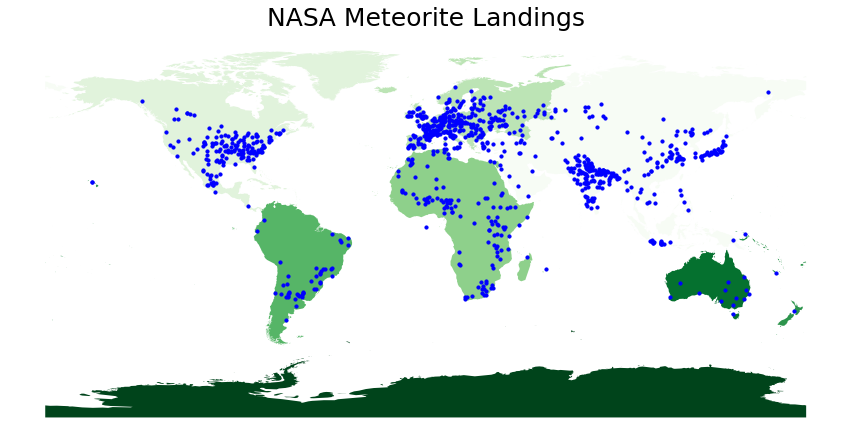

In [78]:
#plot coordinates on top of map graph

#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(15,10))

#this is the map 
basemap = map_df.plot(ax=ax,cmap='Greens')

#plot coordinates on top of map graph
geo_meteor.plot(ax=basemap, color='blue', marker="o", markersize=10)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("NASA Meteorite Landings", fontsize=25, fontweight=3)